In [62]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import heapq

In [63]:
# Load the dataset
data = pd.read_csv(r"C:\Users\amlmk\Desktop\diabetes - Copy.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [64]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [65]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [66]:
# Separate features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [68]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49
534,1,77,56,30,56,33.3,1.251,24
344,8,95,72,0,0,36.8,0.485,57
296,2,146,70,38,360,28.0,0.337,29


# Random Forest Model

In [69]:
# NORMAL FULL FEATURES MODEL TRAINING
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7207792207792207


## PRIORITY QUEUE IMPLIMENTATION AND FEATURE SELECTION-Random Forest

In [96]:
# PRIORITY QUEUE MODEL TRAINING
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

# Use absolute values for importance scores
priority_queue = [(-abs(score), index) for index, score in enumerate(feature_importances)]
heapq.heapify(priority_queue)

# Number of features to select
num_features_to_select = 5

# Dequeue features based on importance scores
selected_features = []

for _ in range(num_features_to_select):
    _, index = heapq.heappop(priority_queue)
    selected_features.append(index)

# Display selected features and their names
selected_feature_names = X.columns[selected_features]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'BloodPressure'], dtype='object')


In [97]:
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]
X_train_selected

,Glucose,BMI,Age,DiabetesPedigreeFunction,BloodPressure
60,84,0.0,21,0.304,0
618,112,28.2,50,1.282,82
346,139,28.7,22,0.654,46
294,161,21.9,65,0.254,50
231,134,46.2,46,0.238,80
...,...,...,...,...,...
71,139,28.6,26,0.411,64
106,96,22.4,27,0.207,122
270,101,45.6,38,1.136,86
435,141,42.4,29,0.205,0


In [98]:
X_test_selected

,Glucose,BMI,Age,DiabetesPedigreeFunction,BloodPressure
668,98,34.0,43,0.430,58
324,112,35.7,21,0.148,75
624,108,30.8,21,0.158,64
690,107,24.6,34,0.856,80
473,136,29.9,50,0.210,90
...,...,...,...,...,...
355,165,30.4,49,0.302,88
534,77,33.3,24,1.251,56
344,95,36.8,57,0.485,72
296,146,28.0,29,0.337,70


In [99]:
# Train a model with top-k features
model_new = RandomForestClassifier(n_estimators=100, random_state=42)
model_new.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [100]:
# Predicting
pred_new = model_new.predict(X_test_selected)

In [101]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# # Evaluate the model
accuracy_new = accuracy_score(y_test, pred_new)
print(f'Accuracy: {accuracy_new}')

Accuracy: 0.7792207792207793


In [102]:
# Evaluate the model with top priority selected features
print(f'Accuracy with top 5 priority features: {accuracy_new:.2f}')

# Evaluate the model with all features
accuracy_full = model.score(X_test, y_test)
print(f'Accuracy with all features: {accuracy:.2f}')

Accuracy with top 5 priority features: 0.78
Accuracy with all features: 0.72


# Descision Tree Model

In [77]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

# Train the classifier on the training data
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

# Evaluate the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt}")


Accuracy: 0.7597402597402597


## PRIORITY QUEUE IMPLIMENTATION AND FEATURE SELECTION-Descision Tree

In [78]:
feature_importances_dt = decision_tree.feature_importances_

# Use absolute values for importance scores
priority_queue_dt = [(-abs(score), index) for index, score in enumerate(feature_importances_dt)]
heapq.heapify(priority_queue_dt)

# Number of features to select
num_features_to_select_dt = 8

# Dequeue features based on importance scores
selected_features_dt = []

for _ in range(num_features_to_select_dt):
    _, index = heapq.heappop(priority_queue_dt)
    selected_features_dt.append(index)

# Display selected features and their names
selected_feature_names_dt = X.columns[selected_features_dt]
print("Selected Features:", selected_feature_names_dt)

Selected Features: Index(['Glucose', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction', 'Age',
       'SkinThickness', 'Insulin', 'Pregnancies'],
      dtype='object')


In [79]:
X_train_selected_dt = X_train.iloc[:, selected_features_dt]
X_test_selected_dt = X_test.iloc[:, selected_features_dt]
X_train_selected_dt

,Glucose,BMI,BloodPressure,DiabetesPedigreeFunction,Age,SkinThickness,Insulin,Pregnancies
60,84,0.0,0,0.304,21,0,0,2
618,112,28.2,82,1.282,50,24,0,9
346,139,28.7,46,0.654,22,19,83,1
294,161,21.9,50,0.254,65,0,0,0
231,134,46.2,80,0.238,46,37,370,6
...,...,...,...,...,...,...,...,...
71,139,28.6,64,0.411,26,35,140,5
106,96,22.4,122,0.207,27,0,0,1
270,101,45.6,86,1.136,38,37,0,10
435,141,42.4,0,0.205,29,0,0,0


In [80]:
X_test_selected_dt

,Glucose,BMI,BloodPressure,DiabetesPedigreeFunction,Age,SkinThickness,Insulin,Pregnancies
668,98,34.0,58,0.430,43,33,190,6
324,112,35.7,75,0.148,21,32,0,2
624,108,30.8,64,0.158,21,0,0,2
690,107,24.6,80,0.856,34,0,0,8
473,136,29.9,90,0.210,50,0,0,7
...,...,...,...,...,...,...,...,...
355,165,30.4,88,0.302,49,0,0,9
534,77,33.3,56,1.251,24,30,56,1
344,95,36.8,72,0.485,57,0,0,8
296,146,28.0,70,0.337,29,38,360,2


In [81]:
# Train a model with top-k features
decision_tree_new = DecisionTreeClassifier()

# Train the classifier on the training data
decision_tree_new.fit(X_train_selected_dt, y_train)

y_pred_dt_new = decision_tree_new.predict(X_test_selected_dt)

# Evaluate the accuracy of the model
accuracy_dt_new = accuracy_score(y_test, y_pred_dt_new)
print(f"Accuracy: {accuracy_dt_new}")

Accuracy: 0.7402597402597403


In [82]:
# Evaluate the model with top priority selected features
print(f'Accuracy with top 5 priority features: {accuracy_dt_new:.2f}')

# Evaluate the model with all features
accuracy_full = model.score(X_test, y_test)
print(f'Accuracy with all features: {accuracy_dt:.2f}')

Accuracy with top 5 priority features: 0.74
Accuracy with all features: 0.76


# Support Vector Machines(SVM)

In [83]:
svm_classifier_model = SVC(kernel='linear')

svm_classifier_model.fit(X_train, y_train)

svm_classifier_model_pred = svm_classifier_model.predict(X_test)

svm_classifier_model_accuracy = accuracy_score(y_test, svm_classifier_model_pred)
print(f'Accuracy: {svm_classifier_model_accuracy}')

Accuracy: 0.7532467532467533


## PRIORITY QUEUE IMPLIMENTATION AND FEATURE SELECTION-SVM

In [84]:
import heapq
import numpy as np

# Assuming you have trained your SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Get feature coefficients (weights)
feature_weights = svm_classifier.coef_

# Calculate the magnitude of feature weights
feature_magnitudes = np.abs(feature_weights)

# Use absolute values for importance scores
priority_queue_svm = [(-magnitude, index) for index, magnitude in enumerate(feature_magnitudes[0])]
heapq.heapify(priority_queue_svm)

# Number of features to select
num_features_to_select_svm = 5

# Dequeue features based on importance scores
selected_features_svm = []

for _ in range(num_features_to_select_svm):
    _, index = heapq.heappop(priority_queue_svm)
    selected_features_svm.append(index)

# Display selected features and their names
selected_feature_names_svm = X.columns[selected_features_svm]
print("Selected Features:", selected_feature_names_svm)


Selected Features: Index(['DiabetesPedigreeFunction', 'BMI', 'Pregnancies', 'Glucose', 'Age'], dtype='object')


In [85]:
X_train_selected_svm = X_train.iloc[:, selected_features_svm]
X_test_selected_svm = X_test.iloc[:, selected_features_svm]
X_train_selected_svm

,DiabetesPedigreeFunction,BMI,Pregnancies,Glucose,Age
60,0.304,0.0,2,84,21
618,1.282,28.2,9,112,50
346,0.654,28.7,1,139,22
294,0.254,21.9,0,161,65
231,0.238,46.2,6,134,46
...,...,...,...,...,...
71,0.411,28.6,5,139,26
106,0.207,22.4,1,96,27
270,1.136,45.6,10,101,38
435,0.205,42.4,0,141,29


In [86]:
X_test_selected_svm

,DiabetesPedigreeFunction,BMI,Pregnancies,Glucose,Age
668,0.430,34.0,6,98,43
324,0.148,35.7,2,112,21
624,0.158,30.8,2,108,21
690,0.856,24.6,8,107,34
473,0.210,29.9,7,136,50
...,...,...,...,...,...
355,0.302,30.4,9,165,49
534,1.251,33.3,1,77,24
344,0.485,36.8,8,95,57
296,0.337,28.0,2,146,29


In [87]:
from sklearn.svm import SVC

svm_classifier.fit(X_train_selected_svm, y_train)

svm_pred_new = svm_classifier.predict(X_test_selected_svm)

accuracy_svm_new = accuracy_score(y_test, svm_pred_new)
print(f"Accuracy: {accuracy_svm_new}")


Accuracy: 0.7597402597402597


In [88]:
# Evaluate the model with top priority selected features
print(f'Accuracy with top 5 priority features: {accuracy_svm_new:.2f}')

# Evaluate the model with all features
accuracy_full = model.score(X_test, y_test)
print(f'Accuracy with all features: {svm_classifier_model_accuracy:.2f}')

Accuracy with top 5 priority features: 0.76
Accuracy with all features: 0.75


## Comparing Results of all Models

╒═════════════════════╤════════════════════════════════════╤═════════════════════════╕
│ Model               │   Top 5 Priority Features Accuracy │   All Features Accuracy │
╞═════════════════════╪════════════════════════════════════╪═════════════════════════╡
│ Random Forest       │                               0.78 │                    0.72 │
├─────────────────────┼────────────────────────────────────┼─────────────────────────┤
│ Decision Tree Model │                               0.74 │                    0.76 │
├─────────────────────┼────────────────────────────────────┼─────────────────────────┤
│ SVM Model           │                               0.76 │                    0.75 │
╘═════════════════════╧════════════════════════════════════╧═════════════════════════╛


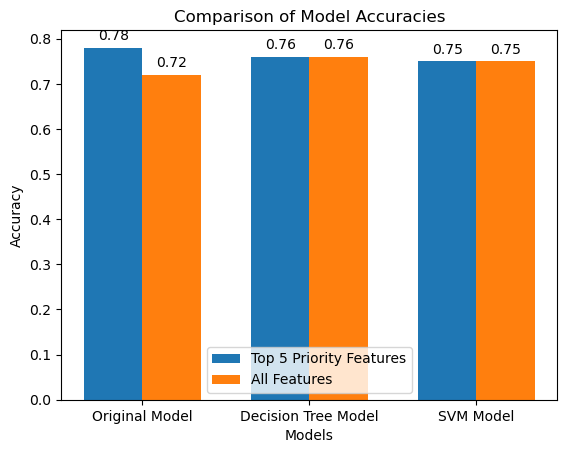

In [89]:
from tabulate import tabulate

# Assuming you have variables like accuracy_new, accuracy, accuracy_dt_new, accuracy_dt,
# accuracy_svm_new, and svm_classifier_model_accuracy defined

# Round the accuracy values to two decimal places
accuracy_new_rounded = round(accuracy_new, 2)
accuracy_dt_rounded = round(accuracy_dt, 2)
accuracy_svm_rounded = round(svm_classifier_model_accuracy, 2)

# Data for the table
table_data = [
    ["Model", "Top 5 Priority Features Accuracy", "All Features Accuracy"],
    ["Random Forest", round(accuracy_new, 2), round(accuracy, 2)],
    ["Decision Tree Model", round(accuracy_dt_new, 2), round(accuracy_dt, 2)],
    ["SVM Model", round(accuracy_svm_new, 2), round(svm_classifier_model_accuracy, 2)]
]

# Display the table
print(tabulate(table_data, headers="firstrow", tablefmt="fancy_grid"))

import matplotlib.pyplot as plt

# Assuming you have variables like accuracy_new, accuracy, accuracy_dt_new, accuracy_dt,
# accuracy_svm_new, and svm_classifier_model_accuracy defined

# Round the accuracy values to two decimal places
accuracy_new_rounded = round(accuracy_new, 2)
accuracy_dt_rounded = round(accuracy_dt, 2)
accuracy_svm_rounded = round(svm_classifier_model_accuracy, 2)

# Data for the plot
models = ["Original Model", "Decision Tree Model", "SVM Model"]
top5_accuracy = [accuracy_new_rounded, accuracy_dt_rounded, accuracy_svm_rounded]
all_features_accuracy = [round(accuracy, 2), round(accuracy_dt, 2), round(svm_classifier_model_accuracy, 2)]

# Plotting
bar_width = 0.35
index = range(len(models))

fig, ax = plt.subplots()
bar1 = ax.bar(index, top5_accuracy, bar_width, label='Top 5 Priority Features')
bar2 = ax.bar([i + bar_width for i in index], all_features_accuracy, bar_width, label='All Features')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Model Accuracies')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models)
ax.legend()

# Annotate bars with accuracy values
for i, v in enumerate(top5_accuracy):
    ax.text(i, v + 0.01, str(v), ha='center', va='bottom')

for i, v in enumerate(all_features_accuracy):
    ax.text(i + bar_width, v + 0.01, str(v), ha='center', va='bottom')

# Display the plot
plt.show()

